Import the numpy and pandas packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

Data inspection

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking null values

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.isnull().sum()*100/titanic.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Removing null values and unwanted columns

In [7]:
titanic=titanic.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [8]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Checking no. of people survived and not survived

In [10]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Finding co-relation

<AxesSubplot:>

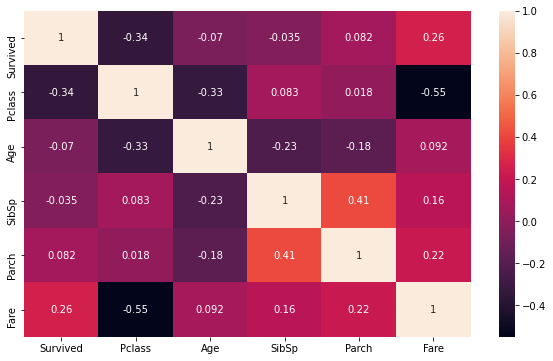

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(),annot=True)

Gender distribution

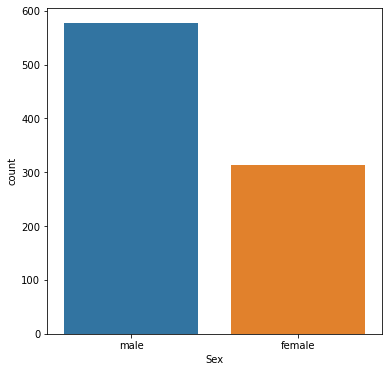

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(titanic['Sex'])
plt.show()

Total no. of male-female survived

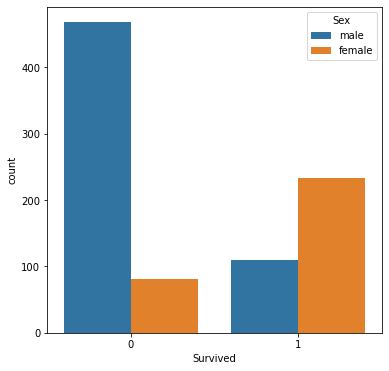

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x="Survived",hue='Sex', data=titanic)
plt.show()

Total no of male and female by class-wise

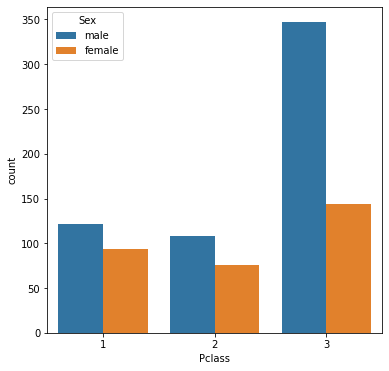

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x="Pclass", hue="Sex", data=titanic)
plt.show()

Total no of male and female by Embarked-wise

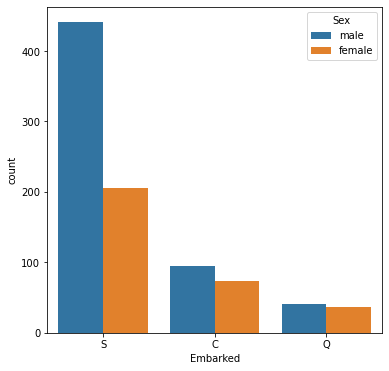

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x="Embarked", hue="Sex", data=titanic)
plt.show()

Total no of survived by Embarked-wise

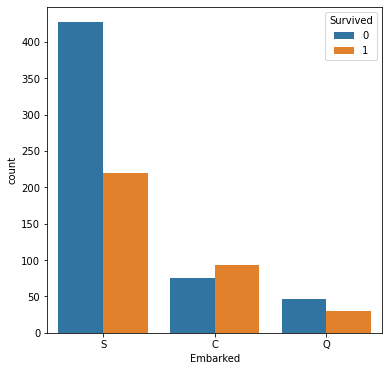

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x="Embarked", hue="Survived", data=titanic)
plt.show()

converting categorical columns to numerical values

In [18]:
titanic.replace({'Embarked':{'S':0,'C':1,'Q':2},'Sex':{'male':1,'female':0}},inplace=True)

Spliting data by train_test_split

In [19]:
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Model Training and Testing

Logistic Regression, Decision Trees, Random Forest, Naive Bayes, svm, K-Nearest Neighbours

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [23]:
lr=LogisticRegression()

dt = DecisionTreeClassifier(max_depth = 3)

rf = RandomForestClassifier(max_depth = 3, n_estimators=500)

nb = GaussianNB

knn = KNeighborsClassifier(n_neighbors=10)

svmm = SVC(kernel = 'linear',C= 0.025, random_state=101)

Testing with LogisticRegression

In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

accuracy1 = accuracy_score(y_pred, y_test)
accuracy1

0.8044692737430168

Testing with DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy2 = accuracy_score(y_pred, y_test)
accuracy2

0.8212290502793296

Testing with RandomForestClassifier

In [26]:
rf = RandomForestClassifier(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy3 = accuracy_score(y_pred, y_test)
accuracy3

0.8212290502793296

Testing with GaussianNB

In [27]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy4 = accuracy_score(y_pred, y_test)
accuracy4

0.7932960893854749

Testing with KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy5 = accuracy_score(y_pred, y_test)
accuracy5

0.8100558659217877

Testing with SVC

In [29]:
svmm = SVC(kernel = 'linear',C= 0.025, random_state=101)
svmm.fit(x_train,y_train)
y_pred = svmm.predict(x_test)
accuracy6 = accuracy_score(y_pred, y_test)
accuracy6

0.7877094972067039

Model Results

In [30]:
metric_results= {'Model': ['Logistic Regression', 'Decision Tree','Random Forest', 'GaussianNB','K Neighbors','SVC'], 
                 'R Square': [accuracy1, accuracy2, accuracy3,accuracy4,accuracy5,accuracy6]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,Logistic Regression,0.804469
1,Decision Tree,0.821229
2,Random Forest,0.821229
3,GaussianNB,0.793296
4,K Neighbors,0.810056
5,SVC,0.787709
